In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from pybaseball.lahman import *

In [0]:
bat = batting()

In [7]:
bat.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


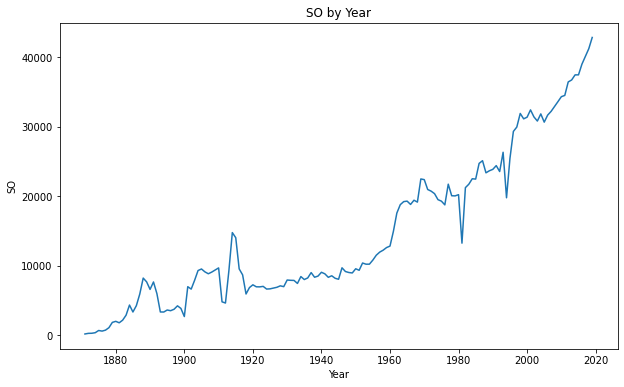

In [202]:
plt.figure(figsize=(10,6))
bat.groupby('yearID').sum()['SO'].plot()
plt.xlabel('Year')
plt.ylabel('SO')
plt.title('SO by Year')
plt.show()

In [33]:
bat.isnull().sum()

playerID        0
yearID          0
stint           0
teamID          0
lgID          738
G               0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
RBI           756
SB           2368
CS          23541
BB              0
SO           2100
IBB         36651
HBP          2817
SH           6069
SF          36104
GIDP        25441
PA          36104
dtype: int64

In [0]:
bat = bat.fillna(0)

In [35]:
bat['PA'] = bat['AB'] + bat['BB'] + bat['HBP'] + bat['SH'] + bat['SF']
bat.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
0,abercda01,1871,1,TRO,0,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,addybo01,1871,1,RC1,0,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,122.0
2,allisar01,1871,1,CL1,0,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,0.0,0.0,0.0,0.0,1.0,139.0
3,allisdo01,1871,1,WS3,0,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,0.0,0.0,0.0,0.0,0.0,133.0
4,ansonca01,1871,1,RC1,0,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,0.0,0.0,0.0,0.0,0.0,122.0


In [51]:
year = bat.groupby('yearID', as_index=False).sum()
year.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
0,1871,115,2296,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,175.0,0.0,0.0,0.0,0.0,74.0,11215.0
1,1872,172,3305,15663,3390,4467,581,145,37,2132.0,269.0,134.0,263,264.0,0.0,0.0,0.0,0.0,97.0,15926.0
2,1873,128,3604,16959,3580,4926,570,211,47,2331.0,314.0,131.0,335,278.0,0.0,0.0,0.0,0.0,122.0,17294.0
3,1874,126,4199,19104,3470,5224,634,194,40,2252.0,242.0,97.0,238,357.0,0.0,0.0,0.0,0.0,107.0,19342.0
4,1875,248,6248,26833,4234,6812,839,273,40,2710.0,629.0,320.0,249,675.0,0.0,0.0,0.0,0.0,142.0,27082.0


In [52]:
year['K/PA'] = (year['SO']/year['PA'])*100
year['BB/PA'] = (year['BB']/year['PA'])*100
year.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,K/PA,BB/PA
0,1871,115,2296,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,175.0,0.0,0.0,0.0,0.0,74.0,11215.0,1.560410,3.504235
1,1872,172,3305,15663,3390,4467,581,145,37,2132.0,269.0,134.0,263,264.0,0.0,0.0,0.0,0.0,97.0,15926.0,1.657667,1.651388
2,1873,128,3604,16959,3580,4926,570,211,47,2331.0,314.0,131.0,335,278.0,0.0,0.0,0.0,0.0,122.0,17294.0,1.607494,1.937088
3,1874,126,4199,19104,3470,5224,634,194,40,2252.0,242.0,97.0,238,357.0,0.0,0.0,0.0,0.0,107.0,19342.0,1.845724,1.230483
4,1875,248,6248,26833,4234,6812,839,273,40,2710.0,629.0,320.0,249,675.0,0.0,0.0,0.0,0.0,142.0,27082.0,2.492430,0.919430


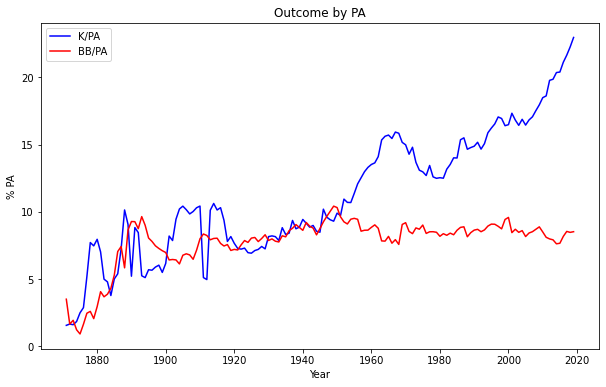

In [68]:
plt.figure(figsize=(10,6))
plt.plot('yearID','K/PA', data= year, color='b')
plt.plot('yearID','BB/PA', data= year, color='r')
plt.xlabel('Year')
plt.ylabel('% PA')
plt.title('Outcome by PA')
plt.legend()
plt.show()

In [73]:
year['HR/PA'] = (year['HR']/year['PA'])*100
year.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,K/PA,BB/PA,HR/PA
0,1871,115,2296,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,175.0,0.0,0.0,0.0,0.0,74.0,11215.0,1.560410,3.504235,0.419082
1,1872,172,3305,15663,3390,4467,581,145,37,2132.0,269.0,134.0,263,264.0,0.0,0.0,0.0,0.0,97.0,15926.0,1.657667,1.651388,0.232325
2,1873,128,3604,16959,3580,4926,570,211,47,2331.0,314.0,131.0,335,278.0,0.0,0.0,0.0,0.0,122.0,17294.0,1.607494,1.937088,0.271771
3,1874,126,4199,19104,3470,5224,634,194,40,2252.0,242.0,97.0,238,357.0,0.0,0.0,0.0,0.0,107.0,19342.0,1.845724,1.230483,0.206804
4,1875,248,6248,26833,4234,6812,839,273,40,2710.0,629.0,320.0,249,675.0,0.0,0.0,0.0,0.0,142.0,27082.0,2.492430,0.919430,0.147700


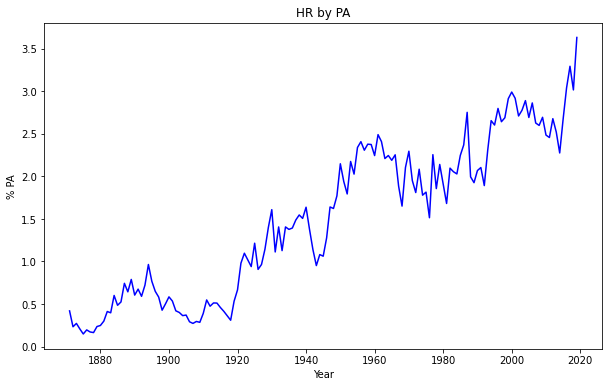

In [78]:
plt.figure(figsize = (10,6))
plt.plot('yearID', 'HR/PA', data=year, color='b')
plt.xlabel('Year')
plt.ylabel('% PA')
plt.title('HR by PA')
plt.show()

In [0]:
import scipy.stats

In [201]:
scipy.stats.pearsonr(year['HR'], year['K/PA'])

(0.9079426232009293, 2.181336220401079e-57)

In [0]:
year['AB/HR'] = year['AB']/year['HR']

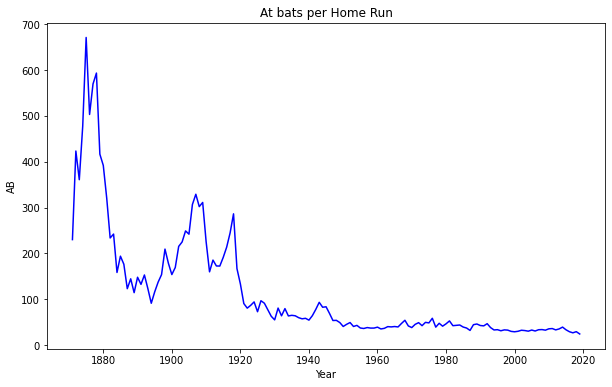

In [209]:
plt.figure(figsize = (10,6))
plt.plot('yearID', 'AB/HR', data=year, color='b')
plt.xlabel('Year')
plt.ylabel('AB')
plt.title('At bats per Home Run')
plt.show()

In [91]:
year['AVE'] = year['H']/year['AB']
year['AVE'] = year['AVE'].round(3)
year.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,K/PA,BB/PA,HR/PA,AVE
0,1871,115,2296,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,175.0,0.0,0.0,0.0,0.0,74.0,11215.0,1.560410,3.504235,0.419082,0.287
1,1872,172,3305,15663,3390,4467,581,145,37,2132.0,269.0,134.0,263,264.0,0.0,0.0,0.0,0.0,97.0,15926.0,1.657667,1.651388,0.232325,0.285
2,1873,128,3604,16959,3580,4926,570,211,47,2331.0,314.0,131.0,335,278.0,0.0,0.0,0.0,0.0,122.0,17294.0,1.607494,1.937088,0.271771,0.290
3,1874,126,4199,19104,3470,5224,634,194,40,2252.0,242.0,97.0,238,357.0,0.0,0.0,0.0,0.0,107.0,19342.0,1.845724,1.230483,0.206804,0.273
4,1875,248,6248,26833,4234,6812,839,273,40,2710.0,629.0,320.0,249,675.0,0.0,0.0,0.0,0.0,142.0,27082.0,2.492430,0.919430,0.147700,0.254


In [93]:
year['OBP'] = (year['H']+year['BB']+year['HBP'])/(year['AB']+year['BB']+year['HBP']+year['SF'])
year['OBP'] = year['OBP'].round(3)
year.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,K/PA,BB/PA,HR/PA,AVE,OBP
0,1871,115,2296,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,175.0,0.0,0.0,0.0,0.0,74.0,11215.0,1.560410,3.504235,0.419082,0.287,0.312
1,1872,172,3305,15663,3390,4467,581,145,37,2132.0,269.0,134.0,263,264.0,0.0,0.0,0.0,0.0,97.0,15926.0,1.657667,1.651388,0.232325,0.285,0.297
2,1873,128,3604,16959,3580,4926,570,211,47,2331.0,314.0,131.0,335,278.0,0.0,0.0,0.0,0.0,122.0,17294.0,1.607494,1.937088,0.271771,0.290,0.304
3,1874,126,4199,19104,3470,5224,634,194,40,2252.0,242.0,97.0,238,357.0,0.0,0.0,0.0,0.0,107.0,19342.0,1.845724,1.230483,0.206804,0.273,0.282
4,1875,248,6248,26833,4234,6812,839,273,40,2710.0,629.0,320.0,249,675.0,0.0,0.0,0.0,0.0,142.0,27082.0,2.492430,0.919430,0.147700,0.254,0.261


In [94]:
year['Single'] = ((year['H'] - year['2B']) - year['3B']) - year['HR']
year['SLG'] = ((year['HR']*4)+(year['3B']*3)+(year['2B']*2)+ year['Single'])/year['AB']
year['SLG'] = year['SLG'].round(3)
year.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,K/PA,BB/PA,HR/PA,AVE,OBP,Single,SLG
0,1871,115,2296,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,175.0,0.0,0.0,0.0,0.0,74.0,11215.0,1.560410,3.504235,0.419082,0.287,0.312,2381,0.384
1,1872,172,3305,15663,3390,4467,581,145,37,2132.0,269.0,134.0,263,264.0,0.0,0.0,0.0,0.0,97.0,15926.0,1.657667,1.651388,0.232325,0.285,0.297,3704,0.348
2,1873,128,3604,16959,3580,4926,570,211,47,2331.0,314.0,131.0,335,278.0,0.0,0.0,0.0,0.0,122.0,17294.0,1.607494,1.937088,0.271771,0.290,0.304,4098,0.357
3,1874,126,4199,19104,3470,5224,634,194,40,2252.0,242.0,97.0,238,357.0,0.0,0.0,0.0,0.0,107.0,19342.0,1.845724,1.230483,0.206804,0.273,0.282,4356,0.333
4,1875,248,6248,26833,4234,6812,839,273,40,2710.0,629.0,320.0,249,675.0,0.0,0.0,0.0,0.0,142.0,27082.0,2.492430,0.919430,0.147700,0.254,0.261,5660,0.310


In [95]:
year['OPS'] = year['OBP'] + year['SLG']
year.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,K/PA,BB/PA,HR/PA,AVE,OBP,Single,SLG,OPS
0,1871,115,2296,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,175.0,0.0,0.0,0.0,0.0,74.0,11215.0,1.560410,3.504235,0.419082,0.287,0.312,2381,0.384,0.696
1,1872,172,3305,15663,3390,4467,581,145,37,2132.0,269.0,134.0,263,264.0,0.0,0.0,0.0,0.0,97.0,15926.0,1.657667,1.651388,0.232325,0.285,0.297,3704,0.348,0.645
2,1873,128,3604,16959,3580,4926,570,211,47,2331.0,314.0,131.0,335,278.0,0.0,0.0,0.0,0.0,122.0,17294.0,1.607494,1.937088,0.271771,0.290,0.304,4098,0.357,0.661
3,1874,126,4199,19104,3470,5224,634,194,40,2252.0,242.0,97.0,238,357.0,0.0,0.0,0.0,0.0,107.0,19342.0,1.845724,1.230483,0.206804,0.273,0.282,4356,0.333,0.615
4,1875,248,6248,26833,4234,6812,839,273,40,2710.0,629.0,320.0,249,675.0,0.0,0.0,0.0,0.0,142.0,27082.0,2.492430,0.919430,0.147700,0.254,0.261,5660,0.310,0.571


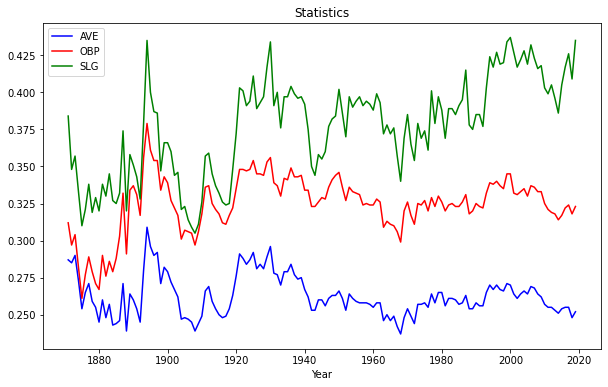

In [98]:
plt.figure(figsize = (10,6))
plt.plot('yearID', 'AVE', data=year, color='b')
plt.plot('yearID', 'OBP', data=year, color='r')
plt.plot('yearID', 'SLG', data=year, color='g')
plt.xlabel('Year')
plt.ylabel('')
plt.title('Statistics')
plt.legend()
plt.show()

In [191]:
scipy.stats.pearsonr(year['HR'], year['AVE'])

(-0.15860130804322406, 0.05336968692758724)

In [194]:
scipy.stats.pearsonr(year['HR'], year['SLG'])

(0.7359740273491922, 1.1109723413459386e-26)

In [126]:
y = year['HR'].values
X = year[['K/PA','SLG']].values
from sklearn.linear_model import LinearRegression
rs = LinearRegression()
rs.fit(X,y)
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     813.0
Date:                Fri, 08 May 2020   Prob (F-statistic):           7.25e-80
Time:                        17:57:25   Log-Likelihood:                -1138.6
No. Observations:                 149   AIC:                             2283.
Df Residuals:                     146   BIC:                             2292.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8097.6338    508.386    -15.928      0.0

In [145]:
team.head()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF,PA,AVE,OBP,Single,SLG,OPS,K/PA,BB/PA,HR/PA
0,1871,45,254,0.0,125,125,2659,10822,3101,434,239,47,393.0,175.0,441.0,123.0,0.0,0.0,2659,1055,38.44,231,4,4,6750,3101,47,393,175,1934,146,7.485,0.0,888,890,11215.0,0.287,0.312,2381,0.384,0.696,1.560410,3.504235,0.419082
1,1872,66,366,0.0,178,178,3390,15665,4467,581,145,37,263.0,265.0,269.0,134.0,0.0,0.0,3390,1334,47.12,327,11,7,9858,4467,37,263,265,2746,189,9.085,0.0,1126,1154,15928.0,0.285,0.297,3704,0.348,0.645,1.663737,1.651180,0.232295
2,1873,45,398,0.0,197,197,3580,16959,4926,570,211,47,335.0,278.0,314.0,131.0,0.0,0.0,3580,1353,35.00,362,8,9,10754,4926,47,335,278,3191,263,7.385,0.0,871,902,17294.0,0.290,0.304,4098,0.357,0.661,1.607494,1.937088,0.271771
3,1874,36,464,0.0,231,231,3470,19104,5224,634,194,40,238.0,357.0,242.0,97.0,0.0,0.0,3470,1015,17.77,439,15,3,12509,5224,40,238,357,3775,221,6.605,0.0,817,812,19342.0,0.273,0.282,4356,0.333,0.615,1.845724,1.230483,0.206804
4,1875,89,690,0.0,335,335,4234,26833,6812,839,273,40,249.0,675.0,629.0,320.0,0.0,0.0,4234,1531,30.90,621,51,18,18571,6812,40,249,675,4802,350,10.903,0.0,1268,1295,27082.0,0.254,0.261,5660,0.310,0.571,2.492430,0.919430,0.147700


In [0]:
team.drop('ERA', axis=1, inplace=True)

In [0]:
team['IP'] = (team['IPouts']/3).round(1)
team['WHIP'] = (team['BBA'] + team['HA'])/(team['IP']).round(3)

In [0]:
team['ERA'] = ((team['ER']/team['IP']) * 9).round(2)

In [163]:
team.head()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF,PA,AVE,OBP,Single,SLG,OPS,K/PA,BB/PA,HR/PA,IP,WHIP,ERA
0,1871,45,254,0.0,125,125,2659,10822,3101,434,239,47,393.0,175.0,441.0,123.0,0.0,0.0,2659,1055,231,4,4,6750,3101,47,393,175,1934,146,7.485,0.0,888,890,11215.0,0.287,0.312,2381,0.384,0.696,1.560410,3.504235,0.419082,2250.0,1.552889,4.22
1,1872,66,366,0.0,178,178,3390,15665,4467,581,145,37,263.0,265.0,269.0,134.0,0.0,0.0,3390,1334,327,11,7,9858,4467,37,263,265,2746,189,9.085,0.0,1126,1154,15928.0,0.285,0.297,3704,0.348,0.645,1.663737,1.651180,0.232295,3286.0,1.439440,3.65
2,1873,45,398,0.0,197,197,3580,16959,4926,570,211,47,335.0,278.0,314.0,131.0,0.0,0.0,3580,1353,362,8,9,10754,4926,47,335,278,3191,263,7.385,0.0,871,902,17294.0,0.290,0.304,4098,0.357,0.661,1.607494,1.937088,0.271771,3584.7,1.467626,3.40
3,1874,36,464,0.0,231,231,3470,19104,5224,634,194,40,238.0,357.0,242.0,97.0,0.0,0.0,3470,1015,439,15,3,12509,5224,40,238,357,3775,221,6.605,0.0,817,812,19342.0,0.273,0.282,4356,0.333,0.615,1.845724,1.230483,0.206804,4169.7,1.309926,2.19
4,1875,89,690,0.0,335,335,4234,26833,6812,839,273,40,249.0,675.0,629.0,320.0,0.0,0.0,4234,1531,621,51,18,18571,6812,40,249,675,4802,350,10.903,0.0,1268,1295,27082.0,0.254,0.261,5660,0.310,0.571,2.492430,0.919430,0.147700,6190.3,1.140656,2.23


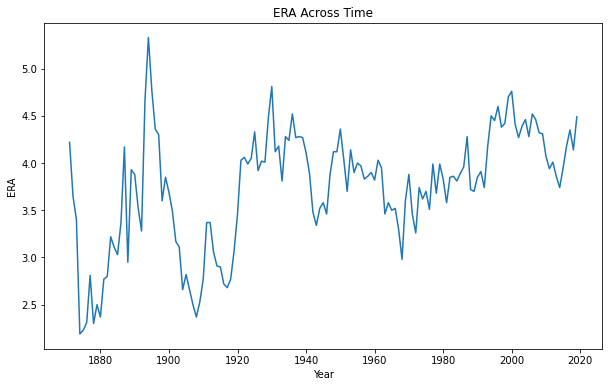

In [168]:
plt.figure(figsize=(10,6))
plt.plot('yearID','ERA',data=team)
plt.ylabel('ERA')
plt.xlabel('Year')
plt.title('ERA Across Time')
plt.show()

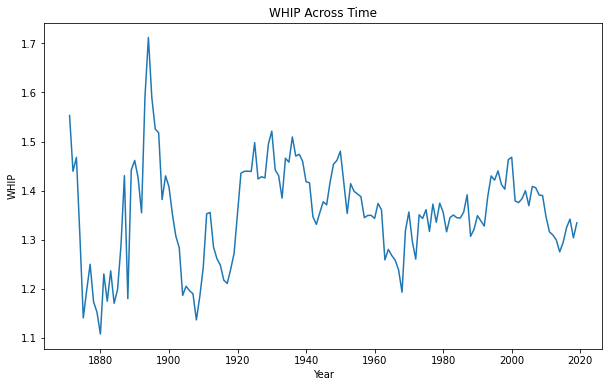

In [181]:
plt.figure(figsize=(10,6))
plt.plot('yearID','WHIP',data=team)
plt.ylabel('WHIP')
plt.xlabel('Year')
plt.title('WHIP Across Time')
plt.show()

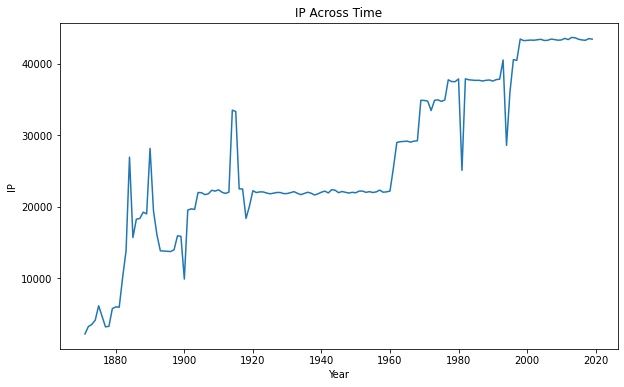

In [182]:
plt.figure(figsize=(10,6))
plt.plot('yearID','IP',data=team)
plt.ylabel('IP')
plt.xlabel('Year')
plt.title('IP Across Time')
plt.show()

In [189]:
scipy.stats.pearsonr(team['ERA'], team['WHIP'])

(0.8530991675636891, 2.2505784463638093e-43)

In [190]:
scipy.stats.pearsonr(team['ERA'], team['HR/PA'])

(0.6493648580398076, 3.3174035813355976e-19)

In [187]:
scipy.stats.pearsonr(team['ERA'], team['IP'])

(0.4436732969552162, 1.4521557578616315e-08)

In [195]:
scipy.stats.pearsonr(team['ERA'], team['SOA'])

(0.4071518801265611, 2.562009048799569e-07)